In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'./diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X = df['Age'].values.reshape(-1,1)
Y = df['BMI'].values.reshape(-1,1)

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

lr = LinearRegression()
lr.fit(X_train,Y_train)
score = lr.score(X_test,Y_test)
print('Accuracy:{}'.format(score))

Accuracy:0.0002791790460993093


In [4]:
from sklearn.metrics import r2_score, mean_squared_error

Y_pred = lr.predict(X_test)

r2 = r2_score(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)

print("r2 error:",r2,"\n RMSE:",mse)

r2 error: 0.0002791790460993093 
 RMSE: 48.8001928315453


Text(0.5, 0, 'dsfa')

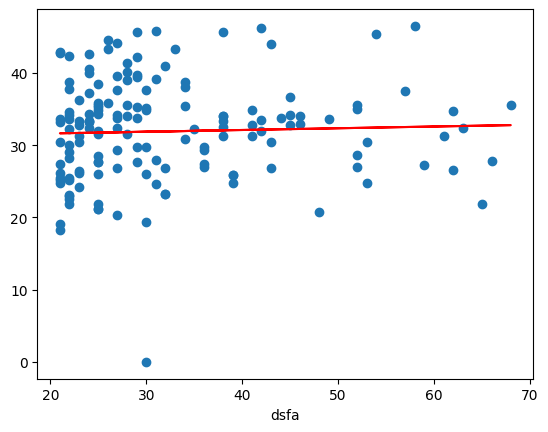

In [5]:
pred = lr.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,pred,color='red')
plt.xlabel("dsfa")

In [6]:
a = lr.coef_
b = lr.intercept_

print(f'Regression Equation: y = {a[0][0]}x + {b[0]}')

Regression Equation: y = 0.0240583486789927x + 31.134960222283663


Multi-dimensional linear regression

In [7]:
X = df.drop(columns=['BMI','Outcome'])
Y = df['BMI'].values

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

lr = LinearRegression()
lr.fit(X_train,Y_train)
score = lr.score(X_test,Y_test)
print('Accuracy:{}'.format(score))

Accuracy:0.2235976544360313


In [8]:
from sklearn.metrics import r2_score, mean_squared_error

Y_pred = lr.predict(X_test)
r2 = r2_score(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred,squared=False)

print("r2 error:",r2,"\n RMSE:",mse)

r2 error: 0.2235976544360313 
 RMSE: 6.2846986132771026


Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5,shuffle=True,random_state=1000)
cv_results = cross_val_score(lr,X,Y,cv=kf)
cv_results

array([0.27809757, 0.28239171, 0.13164544, 0.2592573 , 0.01953001])

In [10]:
from sklearn.linear_model import Ridge
alphas = [0.1,1.0,10.0,100.0,1000.0,10000.0]
score =[]
for i in alphas:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train,Y_train)

    add = ridge.score(X_test,Y_test)
    score.append(add)

print(score)

[0.22359443692166436, 0.22356545743141287, 0.22327902218194995, 0.22150218764607787, 0.21978875573282985, 0.22064862044459754]


In [11]:
from sklearn.linear_model import Lasso
alphas = [0.1,1.0,10.0,100.0,1000.0,10000.0]
score =[]
for i in alphas:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train,Y_train)

    add = lasso.score(X_test,Y_test)
    score.append(add)

print(score)

[0.2202696566063177, 0.21815900785998887, 0.20531816779316936, 0.01759220835325903, -0.011177900041036803, -0.011177900041036803]


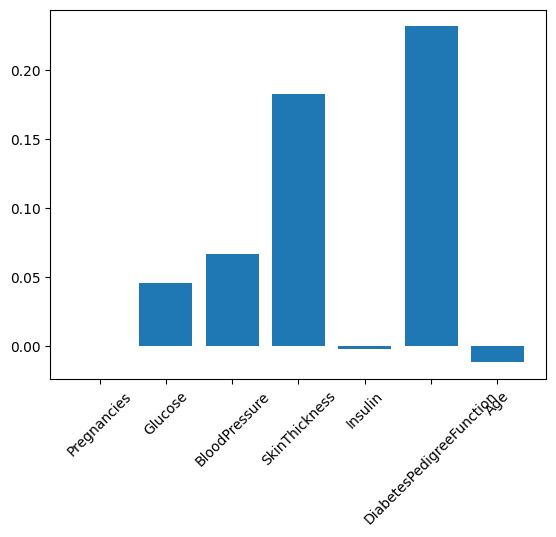

In [12]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)
plt.bar(X.columns, lasso.coef_)
plt.xticks(rotation = 45)
plt.show()

In [13]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')